<H1 style="text-align: center">ECMM424 - Computer Modelling and Simulation </H1>
<H2 style="text-align: center">Assignment 2: Markov chain </H2>

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
| 
30th April 2020  | 18th May 2020 |


This assignment is worth 70% of the total module mark.



Candidate number:  <font color="red">*660028124*</font>

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


# Exercise 1

Consider the Discrete-Time Markov Chain as shown below. Work out the following problems for this Markov chain.


---
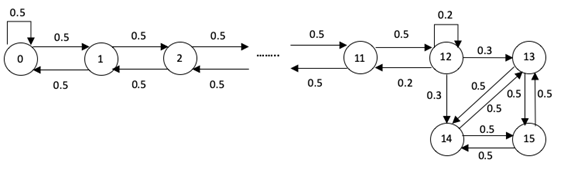


a. Write a simulation program to run 100 trials where each trial records the state of the Markov chain after 200 moves and each trial has a random initial state. This program should draw a figure showing the percentage of trials (y axis) against various states (x axis). 
<div style="text-align: right"><b>[25 marks]</b></div>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.preprocessing import normalize
import random
import math
%matplotlib inline

In [ ]:
def Initialize(ntrials,N):
    """
    Initialize the MarkovChain instance and returns dictionary index states and list of random starting postions

    Parameters
    ----------
    ntrials: the number of trials

    N: Number of states in the markov chain
    """

    
    states = list(range(0,N))

    x = np.random.randint(size=ntrials,
                        low=0, high=N) # a list of random initial states
    
    
    index_dict = {states[index]: index for index in 
                        range(len(states))}

    return index_dict,states,x

def next_state(current_state,states):
    """
    Returns the state of the random variable at the next time 
    instance.

    Parameters
    ----------
    current_state: str
        The current state of the system.
    """
    return ( np.random.choice(
        states, 
        p=transition_matrix[index_dict[current_state], :]
    ))

def generate_states(current_state, nmoves):
    """
    Generates the next states of the system.

    Parameters
    ----------
    current_state: str
        The state of the current random variable.

    no: int
        The number of future states to generate.
    """
    future_states = []
    for i in range(nmoves):
        nx_state = next_state(current_state,states)
        future_states.append(nx_state)
        current_state = nx_state
    return future_states

def MarkovChain(x,N,ntrials, nmoves):
    """
    Initialize the MarkovChain instance.

    Parameters
    ----------
    transition_matrix: 2-D array
        A 2-D array representing the probabilities of change of 
        state in the Markov Chain.

    states: 1-D array 
        An array representing the states of the Markov Chain. It
        needs to be in the same order as transition_matrix.
    """
    path = np.zeros((N,))
    for d in range(0,ntrials):
        current_state = x[d]
        path[generate_states(current_state, nmoves)[-1]] +=1  # count the occurance of each state on average.
    return path/ntrials 
    
    

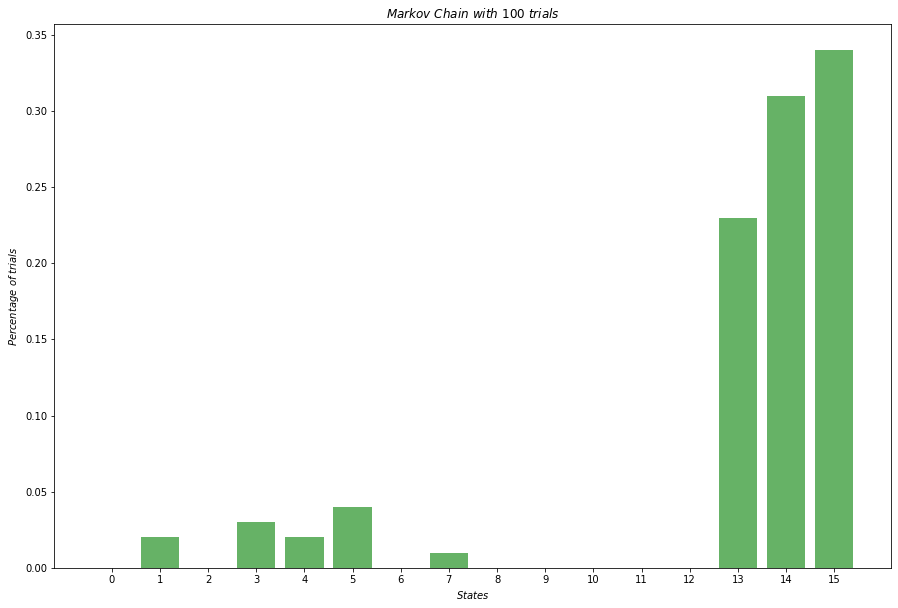

In [ ]:
nmoves = 200
ntrials = 100
transition_matrix = np.zeros((16,16))
N = 16  # maximum population size

#transition rules
transition_matrix[0][0] = 0.5
transition_matrix[0][1] = 0.5
transition_matrix[12][12]= 0.2
transition_matrix[12][13] = 0.3
transition_matrix[12][14]= 0.3
transition_matrix[12][11] = 0.2
transition_matrix[13][14]= 0.5
transition_matrix[13][15] = 0.5
transition_matrix[14][13]= 0.5
transition_matrix[14][15] = 0.5
transition_matrix[15][14]= 0.5
transition_matrix[15][13] = 0.5

for column in range(1,12):
    transition_matrix[column][column-1] = 0.5
    transition_matrix[column][column+1] = 0.5

transition_matrix = np.atleast_2d(transition_matrix)


index_dict,states,x = Initialize(ntrials,N)
x_axis = states
y_axis = MarkovChain(x, N,ntrials, nmoves)

plt.figure(figsize=(15, 10))
plt.xticks(np.arange(0, 16, 1))

plt.bar(x_axis,y_axis, width=0.8, bottom=None, align='center',color='g', alpha=0.6)
plt.xlabel(r'$States$')
plt.ylabel(r'$Percentage~of~trials$')
plt.title(r'$ Markov~Chain~with~%d~trials$'%(ntrials))


plt.show()


b. Whether the Markov chain has a steady-state distribution? Explain your answer.  
<div style="text-align: right"><b>[5 marks]</b></div>


The Markov chain does not have a steady-state distribution because it is irreducible. Looking at the transition diagram states 13,14, and 15 are closed subsets of states which means that one in any of these state it is not possible to reach other states from state 0 to 12.  This is shown in the graph where after 100 trials there are zero occurrences in some states and maximum occurrence in states 13,14, and 15.

## Exercise 2
Consider the Markovian queueing system shown below. Branch labels are arrival and service rates. Node labels give the number of customers in the system. Set $ \lambda$ = 2, $\mu $ = 3.

---

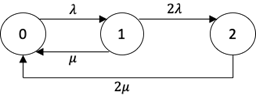

a. Write a simulation program for the above queueing system. 
<div style="text-align: right"><b>[30 marks]</b></div>


In [ ]:
transition_matrix = np.zeros((3,3))
N = 3  # maximum population size

#transition rules
transition_matrix[0][1] = 2
transition_matrix[1][0] = 3
transition_matrix[1][2]= 4
transition_matrix[2][0] = 6

transition_matrix[0][0]= -2
transition_matrix[1][1] = -7
transition_matrix[2][2]= -6
Q = transition_matrix

def simulation(Q, max_time=100000):
    """
    Run a single simulation of the continuous markov chain that corresponds to Q.

    Parameters
    ----------
    Q: The transition matrix.
    max_time: simulation time.
    """
    
    dimension = Q.shape[0]

    state, clock = 0, 0

    history = {}

    while clock < max_time:

        row = Q[state]

        potential_states = np.where(row > 0)[0]

        rates = row[potential_states]

        if len(rates)>1:

            samples = []

            a = random.expovariate(rates[0])

            b = random.expovariate(rates[1])

            samples+= a,b

        else:

            samples = random.expovariate(rates[0])

        time = np.min(samples)
        
        clock += time
        
        try:
            history[state] += time

        except KeyError:

            history[state] = time
                
        state = potential_states[np.argmin(samples)]

    return history


def state_probability_vector(history, dimension):
    """
    Convert the states history to a probability vector.

    Parameters
    ----------
    history: The is a dictionary of the occursnce of each state after simulation. 
    dimension: this is the number of states in the markov chain.
    """
    total_time = np.sum(list(history.values()))

    return np.array([history.get(state) for state in range(dimension)] / total_time)



dimension = Q.shape[0]
his = simulation(Q)
ssp = state_probability_vector(his,dimension)

The simulation results: [0.67826981 0.19259702 0.12913317]



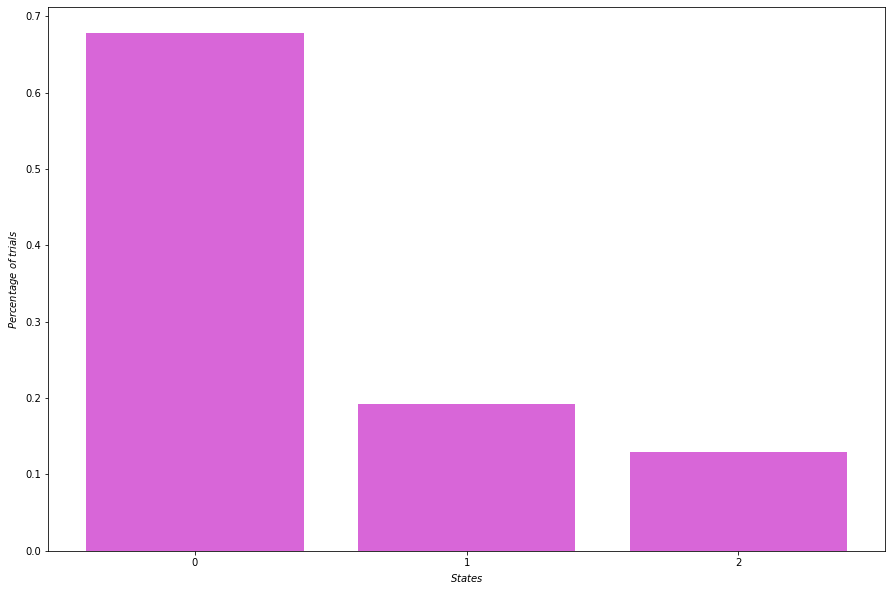

In [ ]:
x_axis = list(range(0,3))
y_axis = np.array(ssp)

print("The simulation results:",y_axis)
print()
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(0, 3, 1))

plt.bar(x_axis,y_axis, width=0.8, bottom=None, align='center',color='m', alpha=0.6)
plt.xlabel(r'$States$')
plt.ylabel(r'$Percentage~of~trials$')

plt.show()

b. Write an analytical model to solve the steady state probabilities $p_k$ (k = 0, 1, 2), compare the analytical results with the simulation results to validate the model accuracy.   
<div style="text-align: right"><b>[25 marks]</b></div> 


Balance equations & Normalization equation:
\begin{equation}
(\lambda) p_0  = (\mu) p_1 + (2\mu) p_2\\
(2\mu) p_2 = (2\lambda) p_1\\
p_0 + p_1 + p_2 = 1
\end{equation}

Replace $\lambda$ and $\mu $ with their respective values:

\begin{equation}
2 p_0  = 3p_1 + 6 p_2\\
6p_2 = 4p_1\\
p_0 + p_1 + p_2 = 1
\end{equation}

Solve for $p_0, p_1$ and $p_2$:

\begin{equation}
p_0 = \frac{21}{31} \approx 0.677~_{(3.d.p)}\\
p_1 = \frac{6}{31} \approx 0.194~_{(3.d.p)}\\
p_2 = \frac{4}{31} \approx 0.129~_{(3.d.p)}
\end{equation}

The simulation result is quite similar to the analytical result, so the model is accurate.



c. Use analytical model to work out the average number of customers in the system and the average response time of a customer.  
<div style="text-align: right"><b>[5 marks]</b></div>


The average number of customers in the system, $\bar{N}$, is given by:

\begin{equation}
\bar{N} = 0\cdot p_0  + 1\cdot p_1 + 2\cdot p_2\\
\bar{N} = 0 + 1 \cdot (\frac{6}{31}) + 2 \cdot (\frac{4}{31})\\
\bar{N} = \frac{6}{31} + \frac{8}{31}\\
\bar{N} \approx 0.452 ~_{(3.d.p)}
\end{equation}

If $L = W \cdot \lambda$, where $L$ is the average number of customers in the system, $W$ is the average response time of a customer and $\lambda$ is the arrival rate, then:

\begin{equation}
W = \frac{L}{\lambda}\\
L = \frac{14}{31}\\
\lambda = 2\\
\therefore  W = \frac{7}{13} \approx 0.539~_{(3.d.p)}
\end{equation}


d. Use analytical model to work out the average first passage times from state 0 and state 1 to state 2, respectively.  
<div style="text-align: right"><b>[10 marks]</b></div>

First Passage Equation for CTMC:

\begin{equation}
m_{i,S} = \frac{1}{a_i} + \sum_{j \notin S} \frac{a_{i,j}}{a_i}m_{j,S} ~~;~i\notin S 
\end{equation}



In this example the non-operative state (S) is 0.Therefore, the average first passage times from state 0 to state 2 is $m_{0,2}$ and from state 1 to state 2 is $m_{1,2}$.

Implementing the equation would give us:

\begin{equation}
m_{0,2} = \frac{1}{a_0} +  \frac{a_{0,1}}{a_0} m_{1,2} \\
m_{1,2} = \frac{1}{a_1} + \frac{a_{1,2}}{a_1} m_{0,2}
\end{equation}

Replacing $a$ with the correct values:

\begin{equation}
m_{0,2} = \frac{3 \cdot \lambda + \mu}{2 \cdot \lambda^2} = \frac{9}{8} \\
m_{1,2} = \frac{\mu + \lambda}{2\cdot \mu + \lambda} = \frac{5}{8}
\end{equation}

When $\lambda = 2$ and $\mu = 3$:

\begin{equation}
m_{0,2} =  \frac{9}{8} \approx 1.125~_{(3.d.p)} \\
m_{1,2} =  \frac{5}{8} \approx 0.625~_{(3.d.p)}
\end{equation}